In [1]:
# data processing
import pandas as pd 
import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold, cross_val_score,GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

In [2]:
### read the date set by using pandas (read_excel())

### read the data Train set 

train_doc = pd.read_excel(r"C:/Users/HP/Desktop/dataset/Doctor_Train.xlsx")
train_doc.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
### read the date set by using pandas (read_excel())

### read the data Test set 

test_doc = pd.read_excel(r"C:/Users/HP/Desktop/dataset/Doctor_Test.xlsx")
test_doc.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [4]:
## check the datatype and other info

train_doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
test_doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [6]:
train_doc.apply(lambda x: len(x.unique()))

Qualification         1420
Experience              64
Rating                  52
Place                  878
Profile                  6
Miscellaneous_Info    2999
Fees                    40
dtype: int64

In [7]:
test_doc.apply(lambda x: len(x.unique()))

Qualification          630
Experience              57
Rating                  37
Place                  593
Profile                  6
Miscellaneous_Info    1085
dtype: int64

In [8]:
train_doc.columns.values

array(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'], dtype=object)

In [9]:
test_doc.columns.values

array(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'], dtype=object)

In [10]:
total = train_doc.isnull().sum().sort_values(ascending=False)

percent_1 = train_doc.isnull().sum()/train_doc.isnull().count()*100

percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

missing_data.head(8)

,Total,%
Rating,3302,55.4
Miscellaneous_Info,2620,44.0
Place,25,0.4
Fees,0,0.0
Profile,0,0.0
Experience,0,0.0
Qualification,0,0.0


### Here we check that 55.4% of the missing value in the "Rating" and 44% of the missing value in "Miscellaneous_Info"

In [11]:
### remove the str('years experience') in the "Experience" columns and convert in to integer 

train_doc['Experience'] = train_doc['Experience'].str.replace('years experience','').astype(int)
test_doc['Experience'] = test_doc['Experience'].str.replace('years experience','').astype(int)

In [12]:
train_doc.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [13]:
## fill the Nan value with the "0%" in the "Rating" column 

train_doc['Rating'].fillna('0%', inplace=True)
test_doc['Rating'].fillna('0%', inplace=True)

In [14]:
## remove the % in the Rating and convert rating in the percentage 

import warnings
import re
warnings.filterwarnings('ignore')

def clean_rating(text):
    text = re.sub(r'%', '', str(text))
    return text

train_doc['Rating'] = train_doc['Rating'].apply(clean_rating)
train_doc['Rating'] = train_doc['Rating'].astype(int)

test_doc['Rating'] = test_doc['Rating'].apply(clean_rating)
test_doc['Rating'] = test_doc['Rating'].astype(int)

In [15]:
### clean the Qualification column 


def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

train_doc['Qualification'] = train_doc['Qualification'].apply(clean_text)
test_doc['Qualification'] = test_doc['Qualification'].apply(clean_text)

def clean_place(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

train_doc['Place'].fillna('missing', inplace=True)
test_doc['Place'].fillna('missing', inplace=True)

train_doc['Place'] = train_doc['Place'].apply(clean_place)
test_doc['Place'] = test_doc['Place'].apply(clean_place)

In [16]:
train_doc['Miscellaneous_Info'].fillna('missing', inplace=True)
test_doc['Miscellaneous_Info'].fillna('missing', inplace=True)

def get_feedback(feedback):
    feedback = re.findall(r'\d+ Feedback', str(feedback))
    if feedback == []:
        feedback = '0 Feedback'
        return feedback
    else:
        return feedback[0]

train_doc['Feedback'] = train_doc['Miscellaneous_Info'].apply(get_feedback)
train_doc['Feedback'] = train_doc['Feedback'].str.replace(' Feedback','')
train_doc['Feedback'] = train_doc['Feedback'].astype(int)

test_doc['Feedback'] = test_doc['Miscellaneous_Info'].apply(get_feedback)
test_doc['Feedback'] = test_doc['Feedback'].str.replace(' Feedback','')
test_doc['Feedback'] = test_doc['Feedback'].astype(int)

In [17]:
def get_fee(text):
    text = re.sub(r',', "", text)
    text = re.findall(r'₹\d+', text)
    if text != []:
        return text[0]
    else:
        return 0

train_doc['Misc_Fees'] = train_doc['Miscellaneous_Info'].apply(get_fee)
train_doc['Misc_Fees'] = train_doc['Misc_Fees'].str.replace('₹','')
train_doc['Misc_Fees'].fillna(50, inplace=True)
train_doc['Misc_Fees'] = train_doc['Misc_Fees'].astype(int)

test_doc['Misc_Fees'] = test_doc['Miscellaneous_Info'].apply(get_fee)
test_doc['Misc_Fees'] = test_doc['Misc_Fees'].str.replace('₹','')
test_doc['Misc_Fees'].fillna(50, inplace=True)
test_doc['Misc_Fees'] = test_doc['Misc_Fees'].astype(float)

In [18]:
def clean_misc(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

train_doc['Miscellaneous_Info'] = train_doc['Miscellaneous_Info'].apply(clean_misc)
test_doc['Miscellaneous_Info'] = test_doc['Miscellaneous_Info'].apply(clean_misc)

In [19]:

train_doc = pd.get_dummies(train_doc, columns=['Profile'])
test_doc  = pd.get_dummies(test_doc,  columns=['Profile'])

In [20]:
# lets check the changes in the dataset

train_doc.head()

,Qualification,Experience,Rating,Place,Miscellaneous_Info,Fees,Feedback,Misc_Fees,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,bhms md homeopathy,24,100,kakkanad ernakulam,100 16 feedback kakkanad ernakulam,100,16,50,0,0,0,0,0,1
1,bams md ayurveda medicine,12,98,whitefield bangalore,98 76 feedback whitefield bangalore,350,76,50,1,0,0,0,0,0
2,mbbs ms otorhinolaryngology,9,0,mathikere bel bangalore,missing,300,0,50,0,0,0,1,0,0
3,bsc zoology bams,12,0,bannerghatta road bangalore,bannerghatta road bangalore 250 available on s...,250,0,250,1,0,0,0,0,0
4,bams,20,100,keelkattalai chennai,100 4 feedback keelkattalai chennai,250,4,50,1,0,0,0,0,0


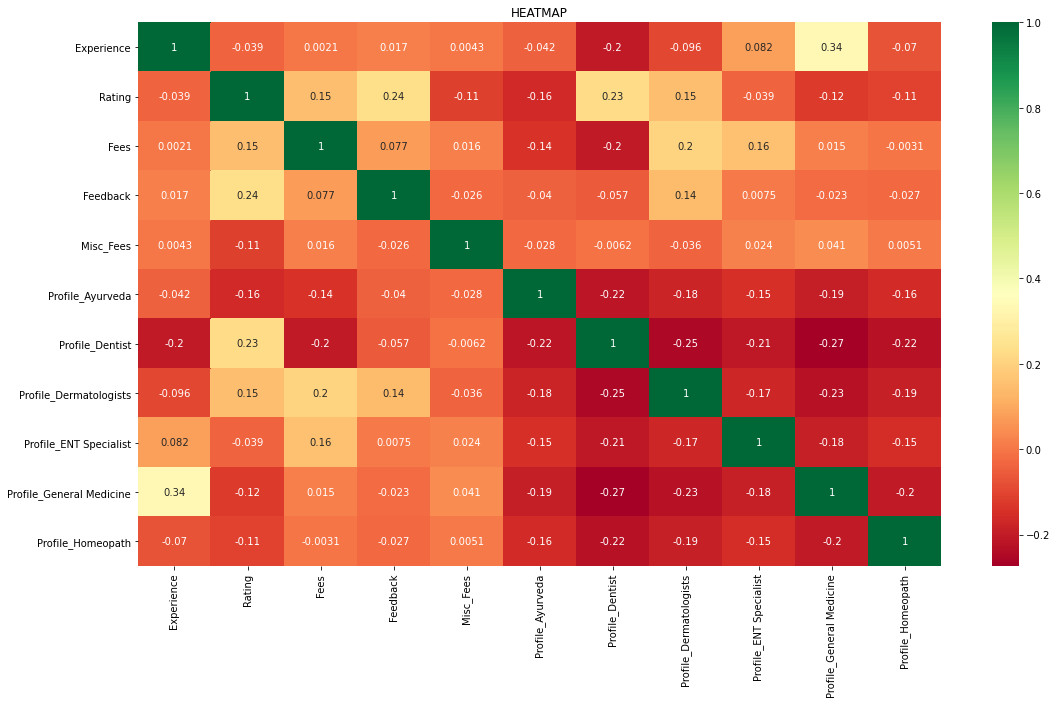

In [21]:
# lets check the correlation by heatmap
cor=train_doc.corr()
top_corr_feature=cor.index
plt.figure(figsize=(18,10))
sns.heatmap(train_doc[top_corr_feature].corr(),annot=True,cmap="RdYlGn")
plt.title("HEATMAP")
plt.show()



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2F5E5CCD0>,
      dtype=object)

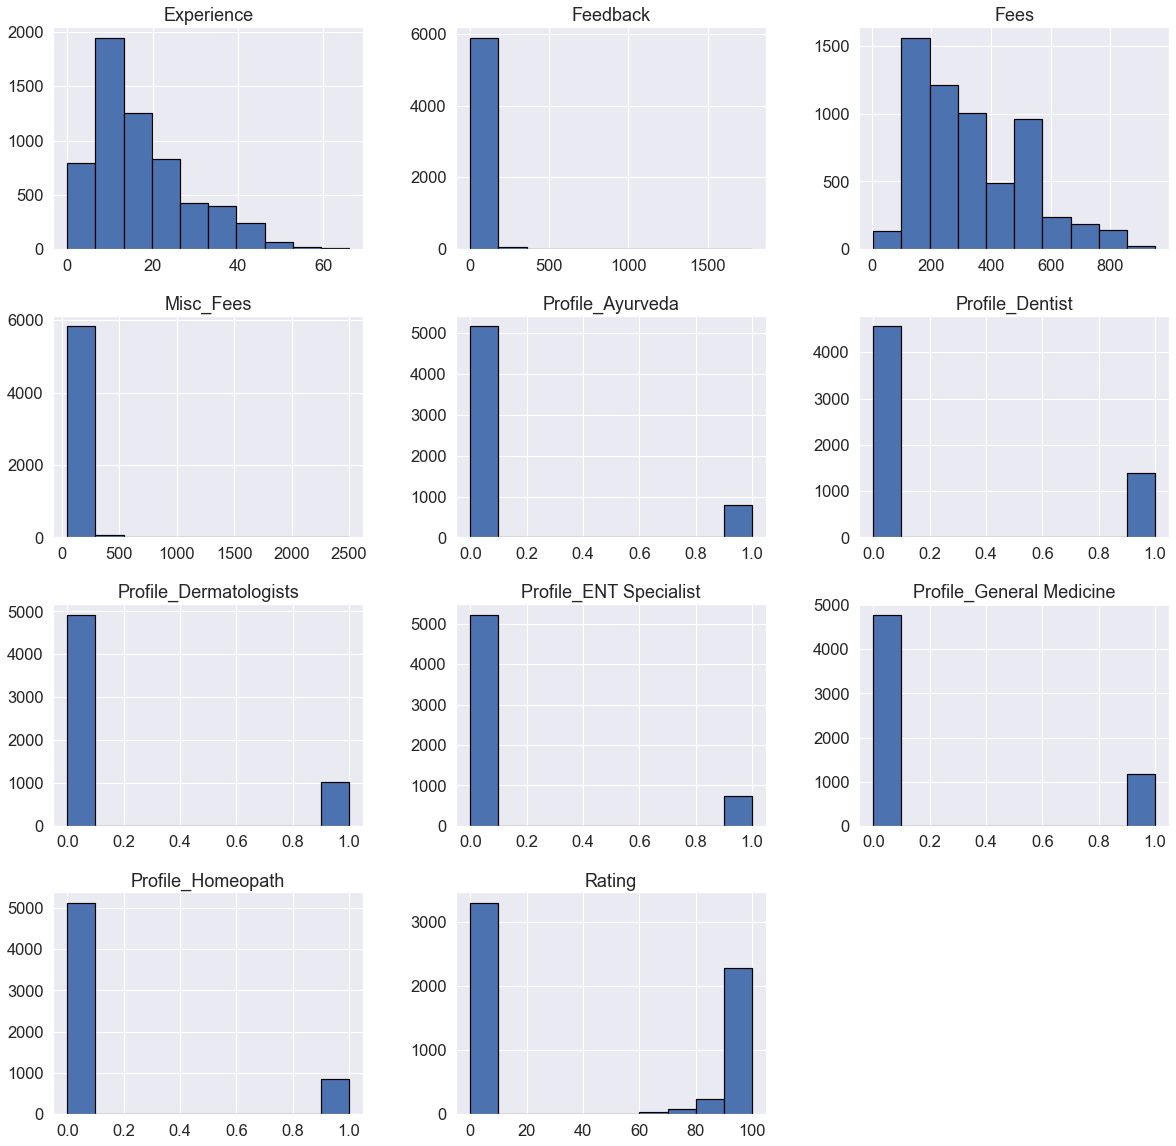

In [22]:
sns.set(font_scale=1.5)
train_doc.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

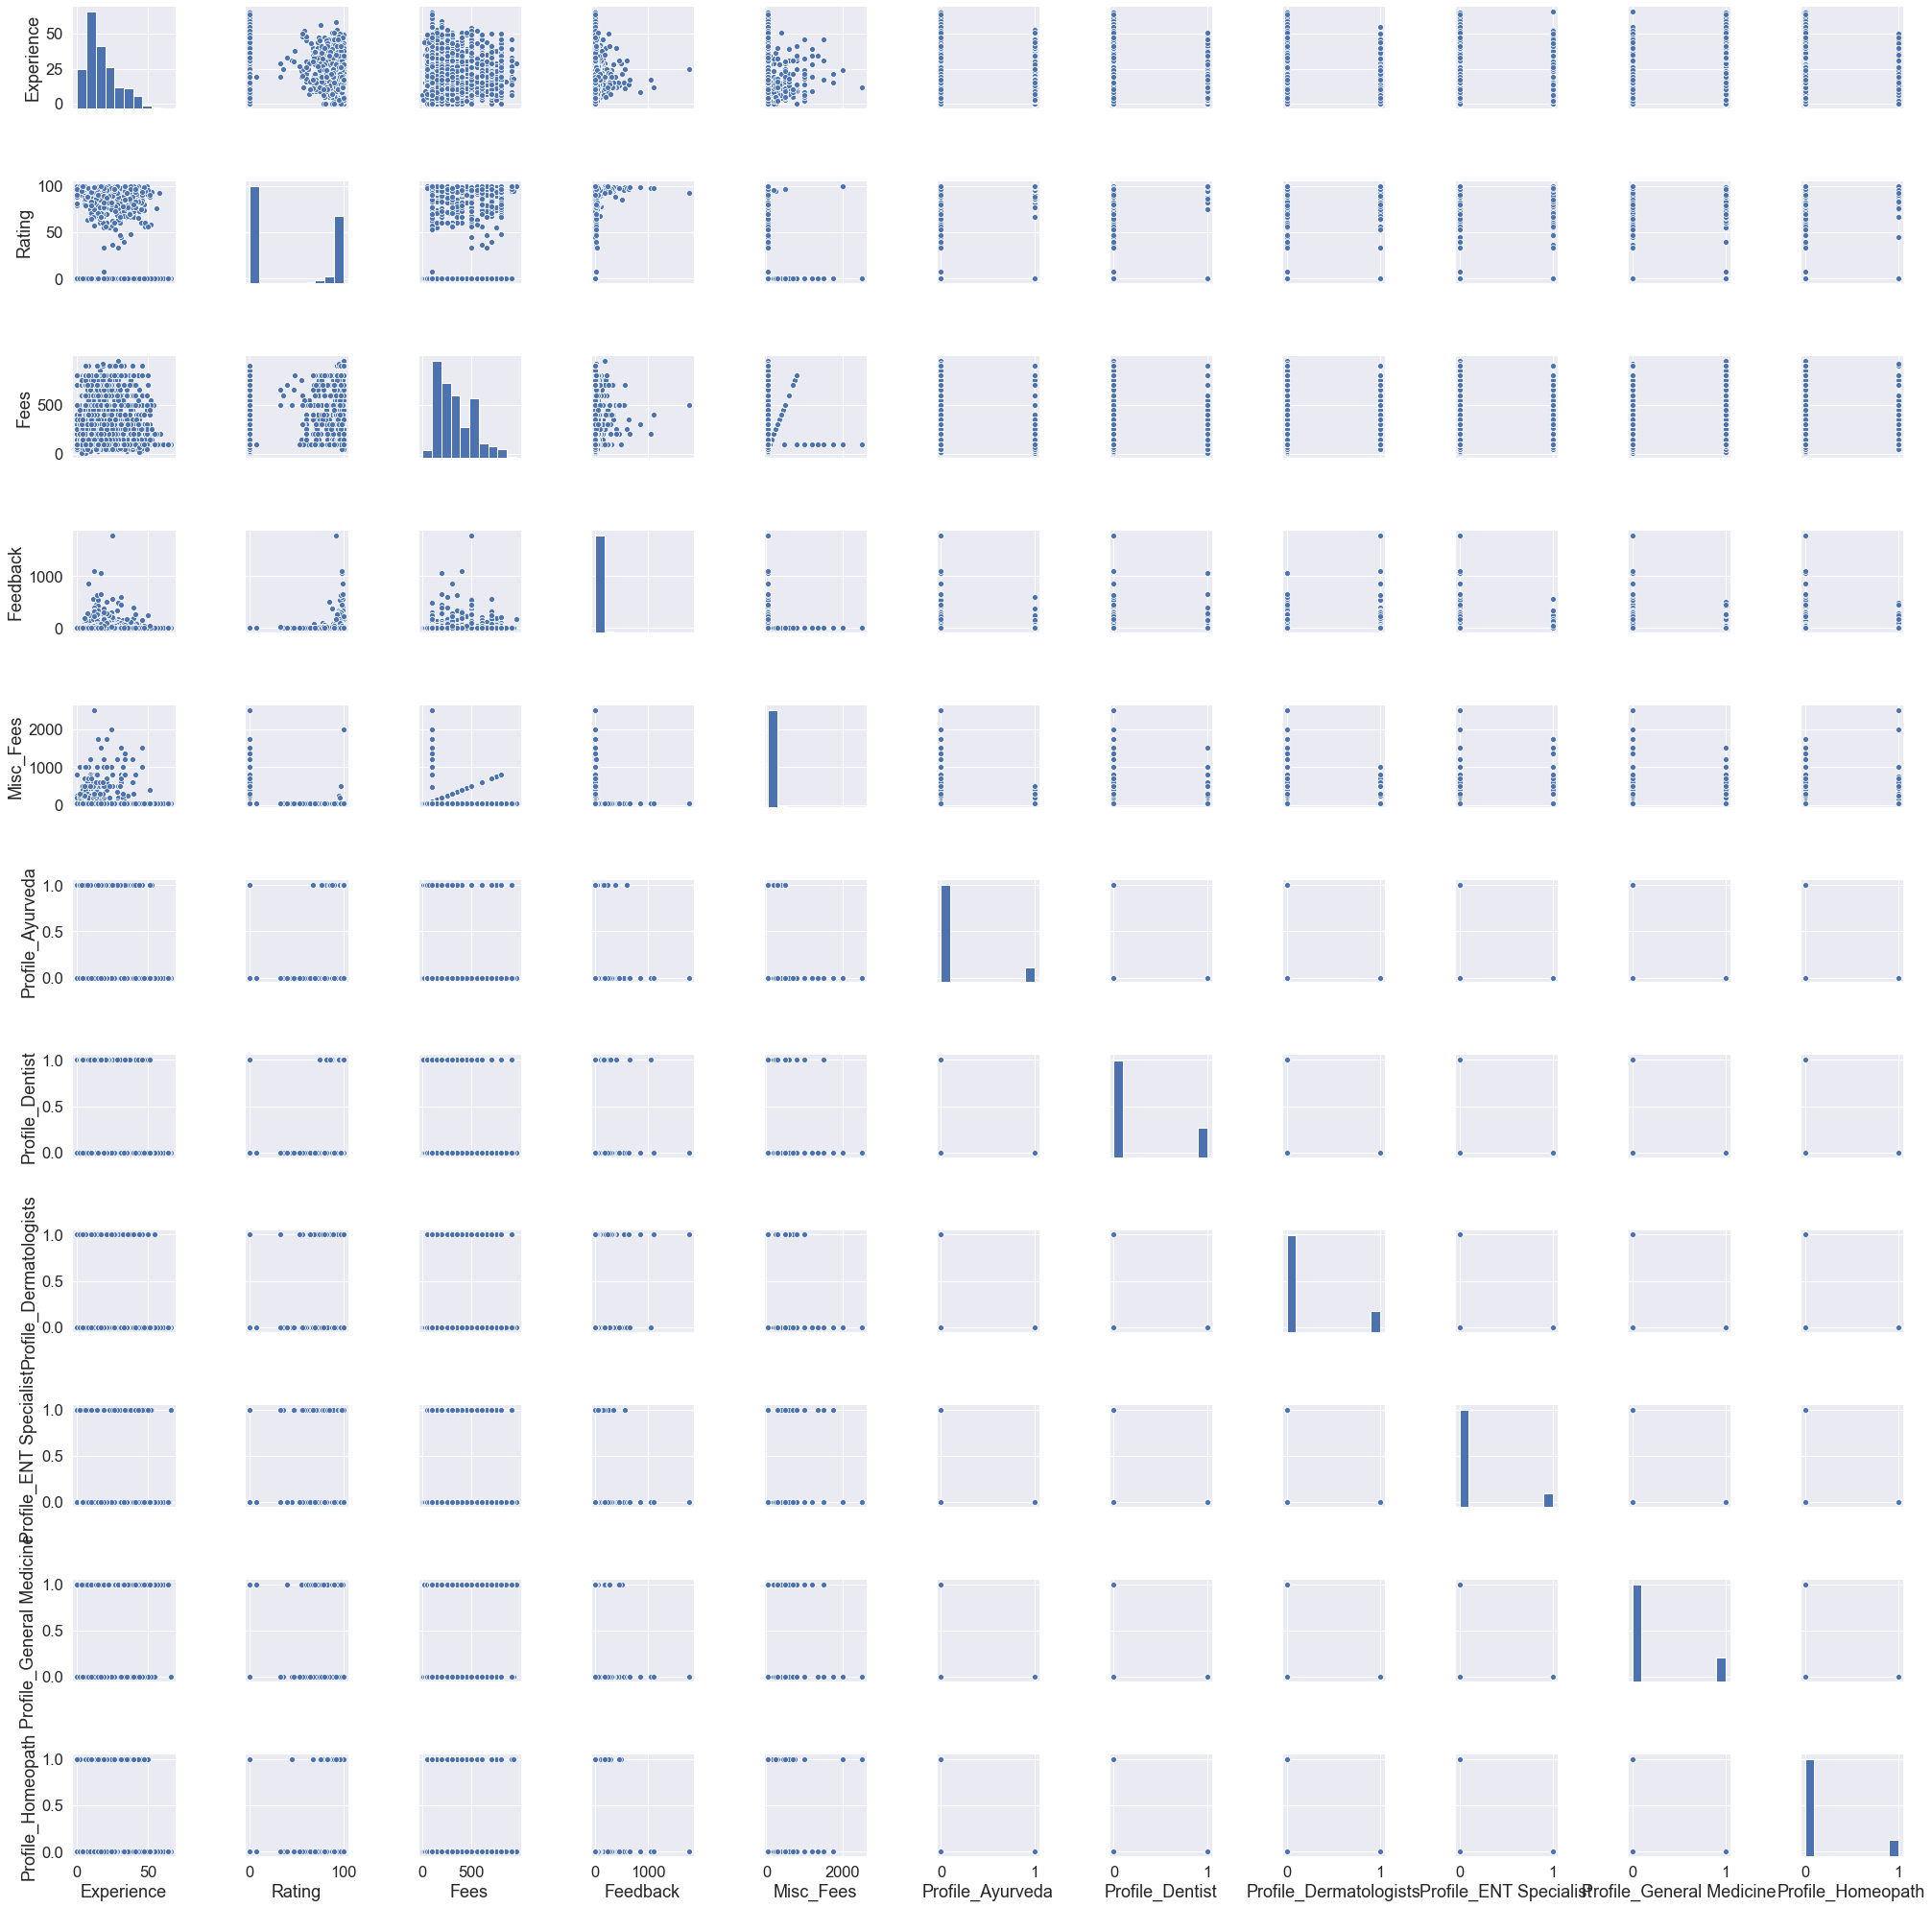

In [23]:
sns.pairplot(data=train_doc)
plt.show()

In [24]:
train_doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Qualification             5961 non-null   object
 1   Experience                5961 non-null   int32 
 2   Rating                    5961 non-null   int32 
 3   Place                     5961 non-null   object
 4   Miscellaneous_Info        5961 non-null   object
 5   Fees                      5961 non-null   int64 
 6   Feedback                  5961 non-null   int32 
 7   Misc_Fees                 5961 non-null   int32 
 8   Profile_Ayurveda          5961 non-null   uint8 
 9   Profile_Dentist           5961 non-null   uint8 
 10  Profile_Dermatologists    5961 non-null   uint8 
 11  Profile_ENT Specialist    5961 non-null   uint8 
 12  Profile_General Medicine  5961 non-null   uint8 
 13  Profile_Homeopath         5961 non-null   uint8 
dtypes: int32(4), int64(1), o

In [25]:
test_doc.head()

,Qualification,Experience,Rating,Place,Miscellaneous_Info,Feedback,Misc_Fees,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,mbbs,35,0,ghatkopar east mumbai,missing,0,50.0,0,0,0,0,1,0
1,mbbs diploma in otorhinolaryngology dlo,31,0,west marredpally hyderabad,missing,0,50.0,0,0,0,1,0,0
2,mbbs ddvl,40,70,kk nagar chennai,70 4 feedback kk nagar chennai,4,50.0,0,0,1,0,0,0
3,bams,0,0,new ashok nagar delhi,missing,0,50.0,1,0,0,0,0,0
4,bds mds conservative dentistry endodontics,16,100,kanakpura road bangalore,general dentistry conservative dentistry cosme...,0,50.0,0,1,0,0,0,0


In [26]:
test_doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Qualification             1987 non-null   object 
 1   Experience                1987 non-null   int32  
 2   Rating                    1987 non-null   int32  
 3   Place                     1987 non-null   object 
 4   Miscellaneous_Info        1987 non-null   object 
 5   Feedback                  1987 non-null   int32  
 6   Misc_Fees                 1987 non-null   float64
 7   Profile_Ayurveda          1987 non-null   uint8  
 8   Profile_Dentist           1987 non-null   uint8  
 9   Profile_Dermatologists    1987 non-null   uint8  
 10  Profile_ENT Specialist    1987 non-null   uint8  
 11  Profile_General Medicine  1987 non-null   uint8  
 12  Profile_Homeopath         1987 non-null   uint8  
dtypes: float64(1), int32(3), object(3), uint8(6)
memory usage: 97.1

In [30]:
## Splite the data set 


X = train_doc.drop(labels=['Fees'], axis=1)
y = train_doc['Fees'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [32]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((4470, 13), (4470,), (1491, 13), (1491,))

## Built the model 

In [33]:
X_train_qual = X_train['Qualification']
X_cv_qual = X_cv['Qualification']

X_train_place = X_train['Place']
X_cv_place = X_cv['Place']

X_train_misc = X_train['Miscellaneous_Info']
X_cv_misc = X_cv['Miscellaneous_Info']


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf1 = TfidfVectorizer(ngram_range=(1,2), binary=True, token_pattern=r'\w{3,}')
X_train_qual = tf1.fit_transform(X_train_qual)
X_cv_qual = tf1.transform(X_cv_qual)

tf2 = TfidfVectorizer()
X_train_place = tf2.fit_transform(X_train_place)
X_cv_place = tf2.transform(X_cv_place)

tf3 = TfidfVectorizer(token_pattern=r'\w{1,}', ngram_range=(1,2))
X_train_misc = tf3.fit_transform(X_train_misc)
X_cv_misc = tf3.transform(X_cv_misc)


In [40]:
X_train_exp = np.array(X_train['Experience']).reshape(-1,1)
X_cv_exp = np.array(X_cv['Experience']).reshape(-1,1)

X_train_feedback = np.array(X_train['Feedback']).reshape(-1,1)
X_cv_feedback = np.array(X_cv['Feedback']).reshape(-1,1)

X_train_rating = np.array(X_train['Rating']).reshape(-1,1)
X_cv_rating = np.array(X_cv['Rating']).reshape(-1,1)

In [44]:

cols = ['Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist', 'Profile_General Medicine',
       'Profile_Homeopath']
X_train_prof = X_train[cols]
X_cv_prof = X_cv[cols]

X_train_miscfees = np.array(X_train['Misc_Fees']).reshape(-1,1)
X_cv_miscfees = np.array(X_cv['Misc_Fees']).reshape(-1,1)

In [45]:
##########
from math import sqrt 
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [46]:
from scipy.sparse import hstack
merged_train = hstack((X_train_exp, X_train_qual, X_train_prof, X_train_place, X_train_rating, X_train_misc, X_train_miscfees))
merged_cv  = hstack((X_cv_exp, X_cv_qual, X_cv_prof, X_cv_place, X_cv_rating, X_cv_misc, X_cv_miscfees))

In [47]:
### lets check the shape 
merged_train.shape, merged_cv.shape

((4470, 8600), (1491, 8600))

In [55]:
## !pip install xgboost

In [56]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.02, 
                   gamma=100, 
                   max_depth=25,  
                   min_child_weight=1, 
                   max_delta_step=0, 
                   subsample=0.75,  
                   colsample_bylevel=0.95,  
                   colsample_bytree=0.70,  
                   reg_lambda=1)
xgb.fit(merged_train, y_train)
y_pred1 = xgb.predict(merged_cv)
y_pred1 = y_pred1.astype(int)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred1)))

RMSLE: 0.5675447549402209


In [49]:

import lightgbm as lgb
train_data = lgb.Dataset(merged_train, label=y_train)
test_data = lgb.Dataset(merged_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'dart',
         'num_iterations': 152,   
         'learning_rate': 0.1,  
         'num_leaves': 52, 
         'max_depth': 28, 
         'min_data_in_leaf': 3, 
         'feature_fraction': 0.66,  
         'feature_fraction_seed': 10,
         'drop_seed': 4,
         'alpha': 100,
         'max_bin': 7,
         'min_data_in_bin': 45,   
         'metric': 'l2_root'
         }

lgbm = lgb.train(params=param,
                 verbose_eval=0,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred2 = lgbm.predict(merged_cv)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred2)))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.102238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6237
[LightGBM] [Info] Number of data points in the train set: 4470, number of used features: 2962
[LightGBM] [Info] Start training from score 307.347651
RMSLE: 0.5642865679271667


In [50]:

from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(base_estimator=None, 
                      n_estimators=80,  
                      max_samples=1.0, 
                      max_features=1.0, 
                      bootstrap=True, 
                      bootstrap_features=True,
                      oob_score=True,
                      n_jobs=None, 
                      random_state=13, 
                      verbose=0)
br.fit(merged_train, y_train)
y_pred5 = br.predict(merged_cv)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred5)))
print('RMSE:', sqrt(mean_squared_error(y_cv, y_pred5)))
#     0.58019310689049

RMSLE: 0.5806959676677481
RMSE: 161.04051685932185


In [51]:
from scipy.sparse import hstack
merged_train = hstack((X_train_exp, X_train_feedback, X_train_qual, X_train_prof, X_train_place, X_train_rating, X_train_misc))
merged_cv  = hstack((X_cv_exp, X_cv_feedback, X_cv_qual, X_cv_prof, X_cv_place, X_cv_rating, X_cv_misc))

In [52]:

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(loss='lad', 
                               learning_rate=0.2,  
                               random_state=10, 
                               n_estimators=92,   
                               max_depth=11,  
                               subsample=1.0, 
                               min_samples_split=40, 
                               min_samples_leaf=1,
                               max_features='auto')
gb.fit(merged_train, y_train)
y_pred3 = gb.predict(merged_cv)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred3)))

RMSLE: 0.5812561135063448


In [53]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=29,  
                           criterion='mse', 
                           max_depth=58,  
                           min_samples_split=5, 
                           min_samples_leaf=2, 
                           min_weight_fraction_leaf=0.0, 
                           max_features='auto', 
                           max_leaf_nodes=None, 
                           min_impurity_decrease=0.20,  
                           bootstrap=True, 
                           oob_score=True, 
                           n_jobs=-1, 
                           random_state=11)  
rf.fit(merged_train, y_train)
y_pred4 = rf.predict(merged_cv)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred4)))

RMSLE: 0.5928716390933947


In [57]:
y_predx = y_pred1*.4 + y_pred2*0.5 + y_pred3*0.1
y_predx = y_predx.astype(int)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_predx)))

RMSLE: 0.5600791956404869


In [58]:

y_predy = y_pred1*0.40 + y_pred2*0.45 + y_pred3*0.10 + y_pred5*0.05
y_predy = y_predy.astype(int)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_predy)))

RMSLE: 0.5601974475312077


In [59]:

y_pred = y_predx*.98 + y_predy*0.02
y_pred = y_pred.astype(int)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred)))

RMSLE: 0.560011092276845
